# 1. fashion MNIST
다음의 조건을 만족하면서 test 데이터에 대한 예측의 정확도를 최대로 높여라.<br><br>
CNN을 이용한다. 그 외에 인공신경망 구조는 자유롭게 선택한다.<br>
model은 클래스를 이용하여 직접 작성한다.<br>
output은 10개(0~9)로 설정한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.transforms import ToTensor

train_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [2]:
len(test_data.data[0]),len(test_data.data[0][0])

(28, 28)

tensor(9)
tensor(2)
tensor(1)
tensor(1)
tensor(6)
tensor(1)
tensor(4)
tensor(6)
tensor(5)
tensor(7)


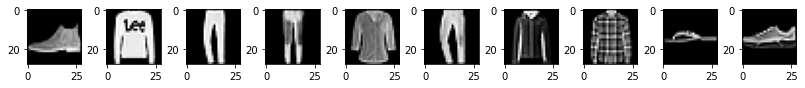

In [3]:
plt.figure(figsize=(14,1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_data.data[i],cmap=plt.cm.gray);
    print(test_data.targets[i])

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [5]:
batch_size = 100
test_loader = torch.utils.data.DataLoader(
    dataset = test_data,
    batch_size = batch_size,
    shuffle = False
)
len(test_loader)

100

In [6]:
import torch.nn as nn
class cnn(nn.Module): 
    def __init__(self): 
        super(cnn, self).__init__() 
        self.conv1 = nn.Conv2d(1, 24, 3, padding=1) 
        self.conv2 = nn.Conv2d(24, 48, 3, padding=1)
        self.fc1 = nn.Linear(7*7*48, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = nn.functional.softmax(x,dim=1)
        return x

In [7]:
model = cnn()

learning_rate = 0.003
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [8]:
def train(model, criterion, optimizer, data):
    model.train() 
    for X,y in test_loader:
        y_pred = model(X)
        loss = criterion(y_pred,y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [9]:
def evaluation(model, criterion, optimizer, data):
    model.eval()
    test_loss = 0
    accuracy = 0

    with torch.no_grad():
        for X, y in test_loader:
            y_pred = model(X)
            test_loss += criterion(y_pred, y)
            
            prediction = y_pred.max(1)[1]
            corrects = (prediction == y)
            accuracy += corrects.sum().float() / float( y.size(0) )
    return test_loss, accuracy        

In [10]:
nums_epoch = 31
for epoch in range(nums_epoch):
    train(model, criterion, optimizer, test_loader)
    
    if(epoch%5==0):
        E, accu = evaluation(model, criterion, optimizer, test_loader)
        print(epoch, "loss=", E.item(), "accu=", accu.item())
        if(epoch==30):
            break

0 loss= 171.53436279296875 accu= 74.70000457763672
5 loss= 162.84149169921875 accu= 83.27999877929688
10 loss= 159.284912109375 accu= 86.8899917602539
15 loss= 156.91847229003906 accu= 89.1200180053711
20 loss= 154.93003845214844 accu= 91.2300033569336
25 loss= 153.11851501464844 accu= 92.9699935913086
30 loss= 152.86163330078125 accu= 93.24000549316406


# 2. 아래의 글을 읽고 500자 이내로 감상문을 작성하세요.<br>
https://webzine.kps.or.kr/?p=5_view&idx=16537

베이커 그룹은 딥마인드가 놓친 단백질 구조를 효율적으로 예측하는 아이디어를 캐치하여 알파폴드1을 단백질 구조 예측에 더 적합한 형태인 trRosetta 로 만들었습니다.<br>
그런데, 딥마인드는 기존 알파폴드1 의 CNN 알고리즘을 Transformer 알고리즘으로 바꾸는 것만으로  비약적인 발전을 이뤄냈습니다.<br>
많은 경우의 수를 효율적으로 고려하는 귀납적 방식이 고전적인 연역적 방식과는 비교도 못할 만큼 학문을 빠르게 발전시킬 수 있다는 사실을 알파폴드2가 보여준 것 입니다.<br>
무서운 속도로 발전하는 딥 러닝 기술은 단백질 구조 추론과 같은 고전적인 방식으로는 발전이 더딘 분야에서는 특히 활약할 것으로 보이고<br>
복잡한 시스템을 다루는 일이 많아진 현대 과학에서는 빠질 수 없는 방식이라 생각합니다.<br>
그렇지만, 딥 러닝으로 많은 사실을 예측할 수 있다고 해도, 왜 그렇게 되는지를 설명하지 못하면 학문은 발전할 수 없다고 생각합니다.<br>
현상을 이해하는 속도가 딥 러닝의 발전에 맞춰 갈 순 없지만, 딥 러닝의 발전 속도에 감동하여 이해하는 것을 가벼이 여기지 않게 경각심을 가져야겠다고 생각합니다.